# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Label을 y로, 나머지 열을 x로 적합데이터와 검증데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
# 평균을 0, 분산을 1로 조정하는 StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# bias만 추출 후 인덱스 초기화
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]

# scaling 및 데이터프레임 재정의
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
# 검증데이터에도 적용
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)  ## transform
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수 => 3
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.(𝜃들) -> 최적의 값으로 변경
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.16778505, 0.92862406, 0.60117443])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [12]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p = \cfrac{1}{1+e^{-x_i\theta}}$

In [13]:
def logistic(X, parameters):
    # z는 𝑥𝑖𝜃
    z = dot_product(X, parameters)
    # logistic function 수식
    p = 1 / (1 + np.exp(-z)) 
    return p

In [14]:
# X_train의 두번째 행만 가져와 logistic function에 적용
logistic(X_train.iloc[1], parameters)

0.785018690754937

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\sum{(y_i\log p(X_i) + (1-y_i)\log(1-p(X_i)))}$

In [25]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)  # 𝑝(𝑋𝑖)
    loss = (y * np.log(p) + (1 - y) * np.log(1-p))
    
    return -loss

In [26]:
def mse_i(X, y, parameters):
    # np.dot(행렬곱), parameters.T(행렬곱을 위한 행렬 전치)
    y_hat = np.dot(X, parameters.T)
    loss = ((y - y_hat)**2) / 2
    return loss

In [27]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):  # X의 행 수 만큼 반복
        X = X_set.iloc[i,:]          # X의 첫 번째 행 부터 시작
        y = y_set.iloc[i]            # y의 첫 번째 값 부터 시작
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [28]:
y_test.iloc[0]

0

In [29]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.1363232469212807

In [30]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

1.2836123613033479

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\sum(y_i - \theta^T X_i)x_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\sum(y_i - p_i)x_{ij}$

In [31]:
def get_gradient_ij(X, y, parameters, j, model):
    
    # 선형회귀
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)  #𝜃𝑇𝑋𝑖
        gradient = (y - y_hat) * X[j]
        
    # 로지스틱회귀
    else:
        p = logistic(X, parameters)
        gradient = (y - p) * X[j]
        
    return -gradient

In [32]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.1099969420892585

In [33]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 2, 'logistic')

0.6693347891751271

In [34]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.25273055035121483

In [35]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 2, 'linear')

1.5378732028766398

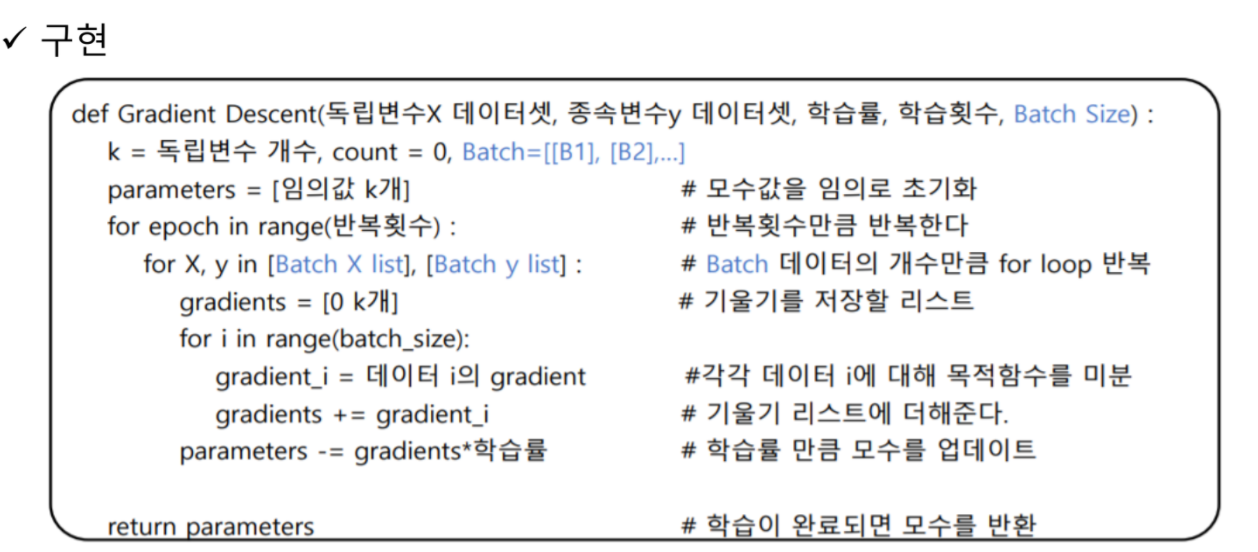

In [4]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [36]:
gradients = [0 for _ in range(4)]

In [37]:
gradients

[0, 0, 0, 0]

In [38]:
def batch_gradient(X_set, y_set, parameters, model):
    
    # parameter 갯수 만큼의 0으로 구성된 리스트 생성
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            # gradient 리스트에 넣기
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [39]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[36.54769813263005, 21.551146381692025, 50.105186934706225]

In [40]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[-16.832242414411578, 188.15251592738676, 207.62835556946277]

## mini-batch
인덱스로 미니 배치 나누기

In [41]:
def batch_idx(X_train, batch_size):
    # 전체 데이터 개수
    N = len(X_train)
    
    # batch 개수
    nb = (N // batch_size)#+1 #number of batch
    
    # 0부터 전체 데이터 수 만큼의 배열 생성
    idx = np.array([i for i in range(N)])
    
    # batch size 만큼의 리스트를 nb개 생성 (if 문 ; 빈 리스트는 생성하지 않으면서)
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

In [57]:
N = 10
batch_size = 2

nb = (N // batch_size)
idx = np.array([i for i in range(10)])

In [58]:
idx

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [59]:
nb

5

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 
N(전체 데이터 개수)과 nb(batch 개수)를 먼저 정의하고, 전체 데이터 수 길이의 숫자 배열(0~N)을 생성한다. 숫자 배열에서 batch size 만큼의 리스트를 nb개 슬라이싱한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [67]:
# parameters : 업데이트 해야하는 수
# gradient : 업데이트할 기울기
# learning_rate : 학습률 에타
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [68]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.16890727, 0.91607972, 0.58733162])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 전체 데이터셋을 이용해 학습한 횟수
- num_epoch: 총 학습 횟수
<br>

BGD: **학습 한 번(1 iteration)** 에 **모든 데이터셋**을 이용해 기울기를 업데이트<br>
SGD: **학습 한 번(1 iteration)** 에 **1개의 데이터**를 이용해 기울기를 업데이트<br>
MGD: **학습 한 번(1 iteration)** 에 데이터셋의 **일부**만 사용해 기울기를 입데이트 
<br>

batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD  
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [64]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [65]:
new_param_bgd = gradient_descent(X_train, y_train,  batch_size = 1)
new_param_bgd

epoch: 0  loss: 0.27165102021099025  params: [-0.89048822  1.19106395 -1.31046152]  gradients: [0.024595885881405093, 0.013385104621840588, 0.017305437592269626]
epoch: 100  loss: 0.07736666688987835  params: [-1.93032618  4.17502094 -4.06769244]  gradients: [0.007538538881502787, 0.0041024800696856855, 0.005304046163646123]
epoch: 200  loss: 0.0773626655176344  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159521434508, 0.004102273621573683, 0.005303779249414278]
epoch: 300  loss: 0.07736266518361691  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767109, 0.004102273604340254, 0.005303779227133389]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 

array([-1.9303681 ,  4.17514311, -4.06780375])

In [70]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 10)
new_param_sgd

epoch: 0  loss: 0.8729808469805338  params: [0.03765391 0.25688081 0.37597568]  gradients: [0.016420633024377004, 0.028773825975671876, 0.04764982076332123]
epoch: 100  loss: 0.31938180125674437  params: [-1.62542281  3.46281832 -3.29818213]  gradients: [0.00254685711166409, -0.0018935919124835512, 0.001963467720888112]
epoch: 200  loss: 0.2988572297346387  params: [-1.78542739  3.98073199 -3.77936152]  gradients: [0.003982688630427848, -0.0018267428123045792, 0.0004100255824053077]
epoch: 300  loss: 0.2932502427689524  params: [-1.83829928  4.15072075 -3.93620737]  gradients: [0.00442930856036595, -0.0017925012180234374, -3.7259981900211946e-05]
epoch: 400  loss: 0.2913046278090505  params: [-1.85788792  4.21358588 -3.99408187]  gradients: [0.004591088096204319, -0.0017788418517195015, -0.0001956987239921431]
epoch: 500  loss: 0.2905749450083396  params: [-1.86541801  4.23773652 -4.0162969 ]  gradients: [0.004652739419194114, -0.0017734759801927159, -0.00025560360973922143]
epoch: 600

array([-1.87019848,  4.2530642 , -4.03039084])

In [71]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 15)
new_param_mgd

epoch: 0  loss: 1.2022623883289818  params: [0.59388225 0.07202864 0.56222432]  gradients: [0.04463604645673051, 0.03176292981430965, 0.06838788223093607]


array([-0.94204216,  1.05427458, -0.96832149])

In [72]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 16)
new_param_mgd

epoch: 0  loss: 1.2726532653273996  params: [0.44782904 0.67675637 0.15283313]  gradients: [0.06058608116364415, 0.05536970314579053, 0.06950596150468921]
epoch: 100  loss: 0.19754470191933995  params: [-1.56610244  3.08603749 -3.03280047]  gradients: [0.007395674173946831, 0.01090488613054929, 0.014483417208959697]


array([-1.69679988,  3.53711395, -3.43584107])

In [73]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 30)
new_param_mgd

epoch: 0  loss: 0.8430725053251479  params: [0.13662957 0.87523493 0.15481687]  gradients: [0.024677055592560705, 0.017283184724384726, 0.041014527303837985]
epoch: 100  loss: 0.3249759686827839  params: [-1.30425264  2.39571404 -2.2834111 ]  gradients: [-0.00022912909991938606, 0.0008439208193820027, 0.006570202833236484]
epoch: 200  loss: 0.2958460698729933  params: [-1.51226604  3.10553127 -2.95740654]  gradients: [0.0012290719589190444, 0.0016115062619720788, 0.0045298311666393835]
epoch: 300  loss: 0.286053865822767  params: [-1.62877642  3.49018892 -3.31824134]  gradients: [0.001996300720152161, 0.0019299260585977371, 0.00367157682962952]
epoch: 400  loss: 0.28161263386262225  params: [-1.70165133  3.7283047  -3.5401196 ]  gradients: [0.0024560457718573172, 0.0021007364986814652, 0.0032066050301022882]
epoch: 500  loss: 0.2792701248516023  params: [-1.74993393  3.88529234 -3.68580159]  gradients: [0.0027515367148522106, 0.0022037999430996793, 0.002923888020641792]
epoch: 600  los

array([-1.84272876,  4.18561686, -3.96322095])

### Predict Label

In [74]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    
    #threshold를 0.5로 설정
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
        
y_predict_random = []

for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix 혼동행렬

In [75]:
from sklearn.metrics import *

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()  #.ravel() : 다차원 배열을 1차원 배열로 평평하게
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 1,  9]], dtype=int64)

In [77]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [78]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [79]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [80]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.48994827, 2.78216547])

In [81]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')  #batch_size=16
new_param

epoch: 0  loss: 0.8354150276065903  params: [1.06524912 0.6803    ]  gradients: [0.00040784801713729483, -0.03512184269921286]
epoch: 100  loss: 0.344428994387966  params: [0.39506687 2.90185775]  gradients: [0.03760229082548401, 0.0024184598219533743]
epoch: 200  loss: 0.34396432001529026  params: [0.39363086 2.90472394]  gradients: [0.03758535350945501, 0.002437741458690661]
epoch: 300  loss: 0.3439636692258817  params: [0.39362885 2.90472796]  gradients: [0.03758532976807774, 0.002437768486149505]
epoch: 400  loss: 0.3439636683136582  params: [0.39362885 2.90472797]  gradients: [0.037585329734798965, 0.0024377685240344208]
epoch: 500  loss: 0.34396366831237885  params: [0.39362885 2.90472797]  gradients: [0.03758532973475231, 0.00243776852408757]
epoch: 600  loss: 0.3439636683123774  params: [0.39362885 2.90472797]  gradients: [0.03758532973475225, 0.0024377685240876234]
epoch: 700  loss: 0.3439636683123774  params: [0.39362885 2.90472797]  gradients: [0.03758532973475225, 0.0024377

array([0.39362885, 2.90472797])

In [83]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

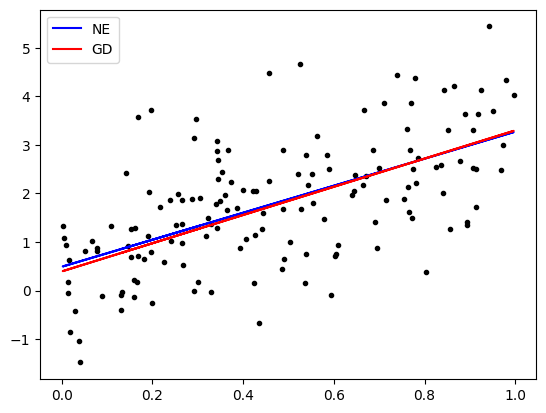

In [84]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()